In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter

In [2]:
missingValues = ["n/a", "na", " ", "__"]
data1 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/site_weather.csv",na_values = missingValues)
data2 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/ele.csv",na_values = missingValues)
data1.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows
#########
data2.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows

In [3]:
#JOIN DATA
data = data1.merge(data2, on='Timestamp', how='left')

In [4]:
data

,Timestamp,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,mels_S,lig_S,lig_N,mels_N,hvac_N,hvac_S
0,2018-01-01 00:00:00+00:00,11.565,11.465,8.120,79.585,66.290,NaN,NaN,NaN,NaN,36.000000,22.500000
1,2018-01-01 00:30:00+00:00,11.515,11.460,8.160,80.060,36.525,NaN,NaN,NaN,NaN,37.700001,19.200001
2,2018-01-01 01:00:00+00:00,11.030,11.080,8.015,81.850,4.130,1.250000,0.200000,NaN,7.150000,37.450001,19.695000
3,2018-01-01 01:30:00+00:00,10.750,10.785,7.975,83.150,0.120,1.150000,0.200000,NaN,7.550000,37.600000,19.094999
4,2018-01-01 02:00:00+00:00,10.785,10.835,7.975,82.950,0.000,1.100000,0.200000,NaN,7.300000,37.300001,24.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,4.780,47.320,408.200,1.795833,0.005556,NaN,8.585667,22.446974,23.104355
35037,2019-12-31 22:30:00+00:00,17.085,14.750,3.785,41.405,330.150,1.827083,0.000000,NaN,8.475536,23.469722,27.520789
35038,2019-12-31 23:00:00+00:00,17.885,15.150,2.845,36.820,282.100,1.754444,0.050000,NaN,8.572000,24.113158,25.355263
35039,2019-12-31 23:30:00+00:00,17.410,15.320,2.780,37.790,212.350,1.898889,0.386250,NaN,8.466270,24.302632,26.358289


In [5]:
data = data.drop(columns = ["dew_point_temperature_set_1d", "relative_humidity_set_1", "solar_radiation_set_1", "mels_S","lig_S","lig_N","mels_N"])


In [6]:
data

,Timestamp,air_temp_set_1,air_temp_set_2,hvac_N,hvac_S
0,2018-01-01 00:00:00+00:00,11.565,11.465,36.000000,22.500000
1,2018-01-01 00:30:00+00:00,11.515,11.460,37.700001,19.200001
2,2018-01-01 01:00:00+00:00,11.030,11.080,37.450001,19.695000
3,2018-01-01 01:30:00+00:00,10.750,10.785,37.600000,19.094999
4,2018-01-01 02:00:00+00:00,10.785,10.835,37.300001,24.800000
...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,22.446974,23.104355
35037,2019-12-31 22:30:00+00:00,17.085,14.750,23.469722,27.520789
35038,2019-12-31 23:00:00+00:00,17.885,15.150,24.113158,25.355263
35039,2019-12-31 23:30:00+00:00,17.410,15.320,24.302632,26.358289


In [7]:
data['hvac'] = data['hvac_N'] + data['hvac_S']
data['temp'] = data['air_temp_set_1'] + data['air_temp_set_2']

In [8]:
data


,Timestamp,air_temp_set_1,air_temp_set_2,hvac_N,hvac_S,hvac,temp
0,2018-01-01 00:00:00+00:00,11.565,11.465,36.000000,22.500000,58.500000,23.030
1,2018-01-01 00:30:00+00:00,11.515,11.460,37.700001,19.200001,56.900002,22.975
2,2018-01-01 01:00:00+00:00,11.030,11.080,37.450001,19.695000,57.145000,22.110
3,2018-01-01 01:30:00+00:00,10.750,10.785,37.600000,19.094999,56.695000,21.535
4,2018-01-01 02:00:00+00:00,10.785,10.835,37.300001,24.800000,62.100001,21.620
...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,22.446974,23.104355,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,17.085,14.750,23.469722,27.520789,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,17.885,15.150,24.113158,25.355263,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,17.410,15.320,24.302632,26.358289,50.660921,32.730


In [9]:
data = data.drop(columns = ['air_temp_set_2','air_temp_set_1','hvac_S','hvac_N'])


In [10]:
data

,Timestamp,hvac,temp
0,2018-01-01 00:00:00+00:00,58.500000,23.030
1,2018-01-01 00:30:00+00:00,56.900002,22.975
2,2018-01-01 01:00:00+00:00,57.145000,22.110
3,2018-01-01 01:30:00+00:00,56.695000,21.535
4,2018-01-01 02:00:00+00:00,62.100001,21.620
...,...,...,...
35036,2019-12-31 22:00:00+00:00,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,50.660921,32.730


In [11]:
#data['Timestamp'] = data.index
data['hours'] = pd.to_datetime(data['Timestamp']).dt.hour
data['day'] = pd.to_datetime(data['Timestamp']).dt.day
data['month'] = pd.to_datetime(data['Timestamp']).dt.month
data['minute'] = pd.to_datetime(data['Timestamp']).dt.minute
data['year'] = pd.to_datetime(data['Timestamp']).dt.year
data = data[data['minute']==30]

In [12]:
data

,Timestamp,hvac,temp,hours,day,month,minute,year
1,2018-01-01 00:30:00+00:00,56.900002,22.975,0,1,1,30,2018
3,2018-01-01 01:30:00+00:00,56.695000,21.535,1,1,1,30,2018
5,2018-01-01 02:30:00+00:00,58.950001,21.490,2,1,1,30,2018
7,2018-01-01 03:30:00+00:00,56.845001,20.885,3,1,1,30,2018
9,2018-01-01 04:30:00+00:00,55.900002,20.010,4,1,1,30,2018
...,...,...,...,...,...,...,...,...
35031,2019-12-31 19:30:00+00:00,42.612001,27.755,19,31,12,30,2019
35033,2019-12-31 20:30:00+00:00,45.731667,27.520,20,31,12,30,2019
35035,2019-12-31 21:30:00+00:00,48.835539,29.625,21,31,12,30,2019
35037,2019-12-31 22:30:00+00:00,50.990512,31.835,22,31,12,30,2019


In [13]:
dataMeanForTemp = pd.DataFrame(data.groupby(by=['minute','hours','month','year'])['temp','hvac'].mean())
dataMeanForTemp.reset_index(inplace=True)


<ipython-input-13-160ce1255729>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataMeanForTemp = pd.DataFrame(data.groupby(by=['minute','hours','month','year'])['temp','hvac'].mean())


In [14]:
dataMeanForTemp

,minute,hours,month,year,temp,hvac
0,30,0,1,2018,24.723548,63.409483
1,30,0,1,2019,24.986452,35.500194
2,30,0,2,2018,29.136071,72.353158
3,30,0,2,2019,19.316786,23.157950
4,30,0,3,2018,26.105000,66.122174
...,...,...,...,...,...,...
571,30,23,10,2019,43.449677,41.469416
572,30,23,11,2018,34.186500,67.359418
573,30,23,11,2019,32.826500,37.350290
574,30,23,12,2018,24.861774,38.622587


In [15]:
data2018 = dataMeanForTemp[dataMeanForTemp['year'] == 2018]
data2019 = dataMeanForTemp[dataMeanForTemp['year'] == 2019]


In [16]:
data2018 = data2018.drop(columns = ['minute','month','year'])
data2019 = data2019.drop(columns = ['minute','month','year'])

<AxesSubplot:ylabel='Density'>

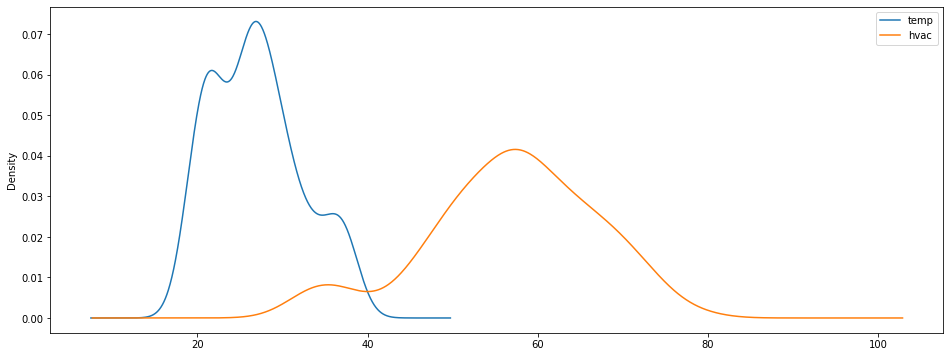

In [17]:
#dataMeanForTemp.set_index('hours', inplace=True)
ser = data2018
ser.plot(x= 'hours', kind='kde',figsize=(16, 6))


<AxesSubplot:ylabel='Density'>

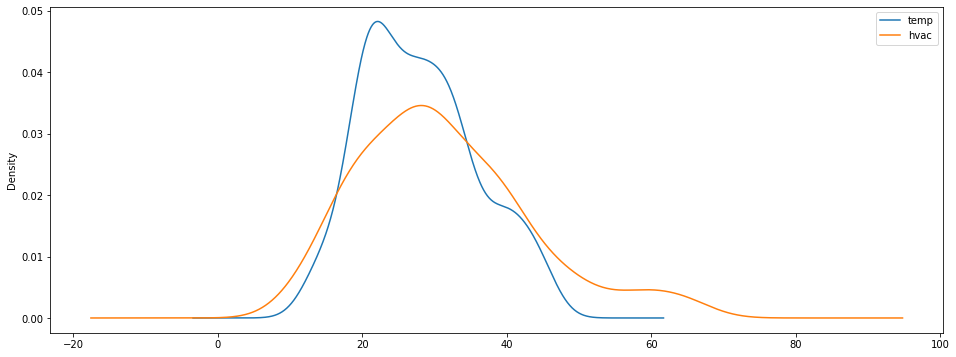

In [18]:
ser = data2019
ser.plot(x= 'hours', kind='kde',figsize=(16, 6))

In [19]:
data2018

,hours,temp,hvac
0,0,24.723548,63.409483
2,0,29.136071,72.353158
4,0,26.105000,66.122174
6,0,28.094667,51.994200
8,0,29.810161,50.466200
...,...,...,...
566,23,37.568871,76.252000
568,23,36.406000,56.140175
570,23,37.365667,64.911502
572,23,34.186500,67.359418


<AxesSubplot:xlabel='hours'>

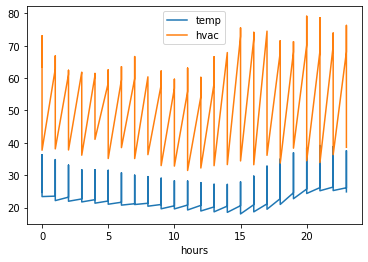

In [20]:
data2018.plot(x='hours')

In [21]:
data2018.min()

hours     0.000000
temp     18.047742
hvac     31.467752
dtype: float64

In [22]:
data2018.max()

hours    23.000000
temp     39.176552
hvac     79.084800
dtype: float64

In [23]:
dataHour2018 = pd.DataFrame(data2018.groupby(by=['hours'])['temp','hvac'].mean())


<ipython-input-23-73b0a1d5a46a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataHour2018 = pd.DataFrame(data2018.groupby(by=['hours'])['temp','hvac'].mean())


In [24]:
dataHour2018

,temp,hvac
hours,,
0,31.137836,60.562006
1,29.572118,55.680216
2,28.114851,53.804313
3,26.913983,53.316455
4,26.299038,53.063401
5,25.772623,51.506108
6,25.344745,53.973096
7,24.851903,52.363270
8,24.497738,52.380299


In [25]:
dataHour2019 = pd.DataFrame(data2019.groupby(by=['hours'])['temp','hvac'].mean())


<ipython-input-25-3f806ed7e56d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataHour2019 = pd.DataFrame(data2019.groupby(by=['hours'])['temp','hvac'].mean())


<AxesSubplot:xlabel='hours'>

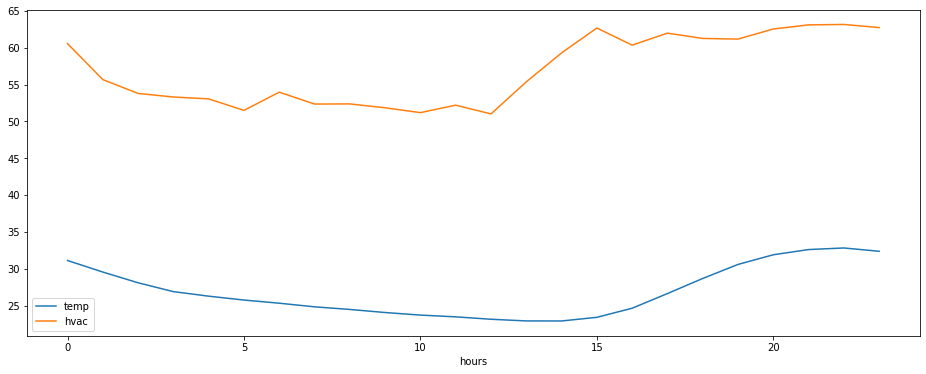

In [29]:
dataHour2018.plot(figsize=(16, 6))

<AxesSubplot:xlabel='hours'>

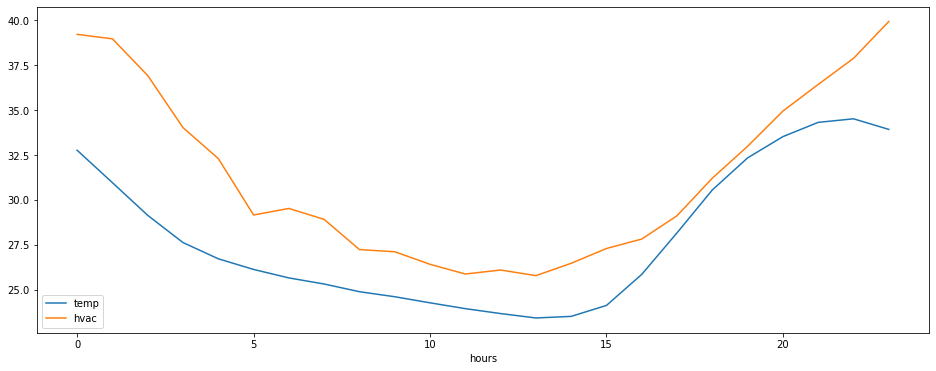

In [30]:
dataHour2019.plot(figsize=(16, 6))